In [2]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

import pandas as pd

from utils.analysys_utils import list_experiments_in_dir

In [3]:
experiments_path = os.path.join(os.getcwd(), "runs", "momentum_train_size_exps", "sidarthe_extended", "Italy")
experiments = list_experiments_in_dir(experiments_path)


In [7]:
data = {
    "m": [],
    "train_size": [],
    "val_loss": []
}

for exp in experiments:
    try: # avoid NaNs
        data['val_loss'].append(exp['final']['best_epoch']['val_loss'])    
        data['m'].append(exp['settings']['m'])
        data['train_size'].append(exp['settings']['train_size'])
    except:
        print(exp['uuid'])
    

df = pd.DataFrame(data)
tsize_100 = df[df['train_size'] == 100]
tsize_100_m_50 = tsize_100[tsize_100['m'] == 0.5]

In [35]:
acc = 0.
mean = tsize_100_m_50['val_loss'].mean()
count = tsize_100_m_50['val_loss'].count()

for val_loss in tsize_100_m_50['val_loss']:
    acc += (val_loss - mean) ** 2

acc = acc / (count-1)
std = acc ** 0.5

std

7947.243505126446

In [36]:
# group by m and a with average
df_by_t_m = df.groupby(['m','train_size']).agg(['mean', 'count', 'std'])['val_loss']

#df_by_t_m['ci95_hi'] = df_by_t_m['mean'] + 1*96 * df_by_t_m['std'] / math.sqrt(df_by_t_m['count'])
df_by_t_m['ci95_hi'] = 1.96 * df_by_t_m['std'] / df_by_t_m['count'].pow(0.5)
df_by_t_m['ci95_lo'] = 1.96 * df_by_t_m['std'] / df_by_t_m['count'].pow(0.5)

df_by_t_m

mean  count           std       ci95_hi       ci95_lo
m    train_size                                                               
0.00 40          2.099884e+06      5  1.732031e+06  1.518193e+06  1.518193e+06
     60          7.413423e+06      5  9.194482e+06  8.059318e+06  8.059318e+06
     80          6.652491e+06      5  7.783721e+06  6.822733e+06  6.822733e+06
     100         9.415405e+06      5  1.393705e+07  1.221636e+07  1.221636e+07
0.05 40          4.370102e+05      5  7.841650e+05  6.873509e+05  6.873509e+05
     60          1.418022e+05      5  2.069534e+05  1.814027e+05  1.814027e+05
     80          9.036441e+04      5  1.300117e+05  1.139603e+05  1.139603e+05
     100         2.541433e+04      5  1.550288e+04  1.358888e+04  1.358888e+04
0.10 40          1.412630e+05      5  1.410874e+05  1.236685e+05  1.236685e+05
     60          5.320125e+04      5  3.648368e+04  3.197935e+04  3.197935e+04
     80          3.427296e+04      5  2.653166e+04  2.325602e+04  2.325602e+04
     100         1.513822e+04      5  7.470686e+03  6.548345e+03  6.548345e+03
0.15 40          7.858381e+04      5  2.734765e+04  2.397127e+04  2.397127e+04
     60          5.508903e+04      5  3.770681e+04  3.305148e+04  3.305148e+04
     80          3.716093e+04      5  2.752802e+04  2.412937e+04  2.412937e+04
     100         1.667191e+04      5  8.425109e+03  7.384933e+03  7.384933e+03
0.20 40          2.364195e+05      5  3.560291e+05  3.120733e+05  3.120733e+05
     60          6.704644e+04      5  2.942355e+04  2.579088e+04  2.579088e+04
     80          3.735478e+04      5  1.706898e+04  1.496162e+04  1.496162e+04
     100         2.035577e+04      5  5.574184e+03  4.885987e+03  4.885987e+03
0.25 40          5.508030e+05      5  1.068663e+06  9.367240e+05  9.367240e+05
     60          7.489780e+04      5  2.793059e+04  2.448224e+04  2.448224e+04
     80          3.650662e+04      5  1.652616e+04  1.448581e+04  1.448581e+04
     100         2.275055e+04      5  8.015924e+03  7.026267e+03  7.026267e+03
0.30 40          7.332456e+05      5  1.502413e+06  1.316923e+06  1.316923e+06
     60          7.231195e+04      5  2.638419e+04  2.312676e+04  2.312676e+04
     80          3.416606e+04      5  1.689598e+04  1.480998e+04  1.480998e+04
     100         2.397554e+04      5  1.280531e+04  1.122435e+04  1.122435e+04
0.35 40          6.876261e+05      5  1.397193e+06  1.224694e+06  1.224694e+06
     60          7.127342e+04      5  2.422379e+04  2.123308e+04  2.123308e+04
     80          3.544689e+04      5  1.691750e+04  1.482884e+04  1.482884e+04
     100         2.477144e+04      5  1.105752e+04  9.692345e+03  9.692345e+03
0.40 40          6.559706e+05      5  1.318350e+06  1.155585e+06  1.155585e+06
     60          6.661090e+04      5  2.114341e+04  1.853301e+04  1.853301e+04
     80          3.667464e+04      5  1.796264e+04  1.574495e+04  1.574495e+04
     100         2.515512e+04      5  1.444958e+04  1.266562e+04  1.266562e+04
0.45 40          6.326261e+05      5  1.260790e+06  1.105131e+06  1.105131e+06
     60          6.483272e+04      5  2.020339e+04  1.770905e+04  1.770905e+04
     80          3.573259e+04      5  1.719570e+04  1.507270e+04  1.507270e+04
     100         2.025369e+04      5  1.010484e+04  8.857279e+03  8.857279e+03
0.50 40          6.104546e+05      5  1.210088e+06  1.060689e+06  1.060689e+06
     60          6.231519e+04      5  1.769180e+04  1.550755e+04  1.550755e+04
     80          3.817898e+04      5  1.578663e+04  1.383759e+04  1.383759e+04
     100         1.691262e+04      5  7.947244e+03  6.966066e+03  6.966066e+03

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002659C0F0388>,
      dtype=object)

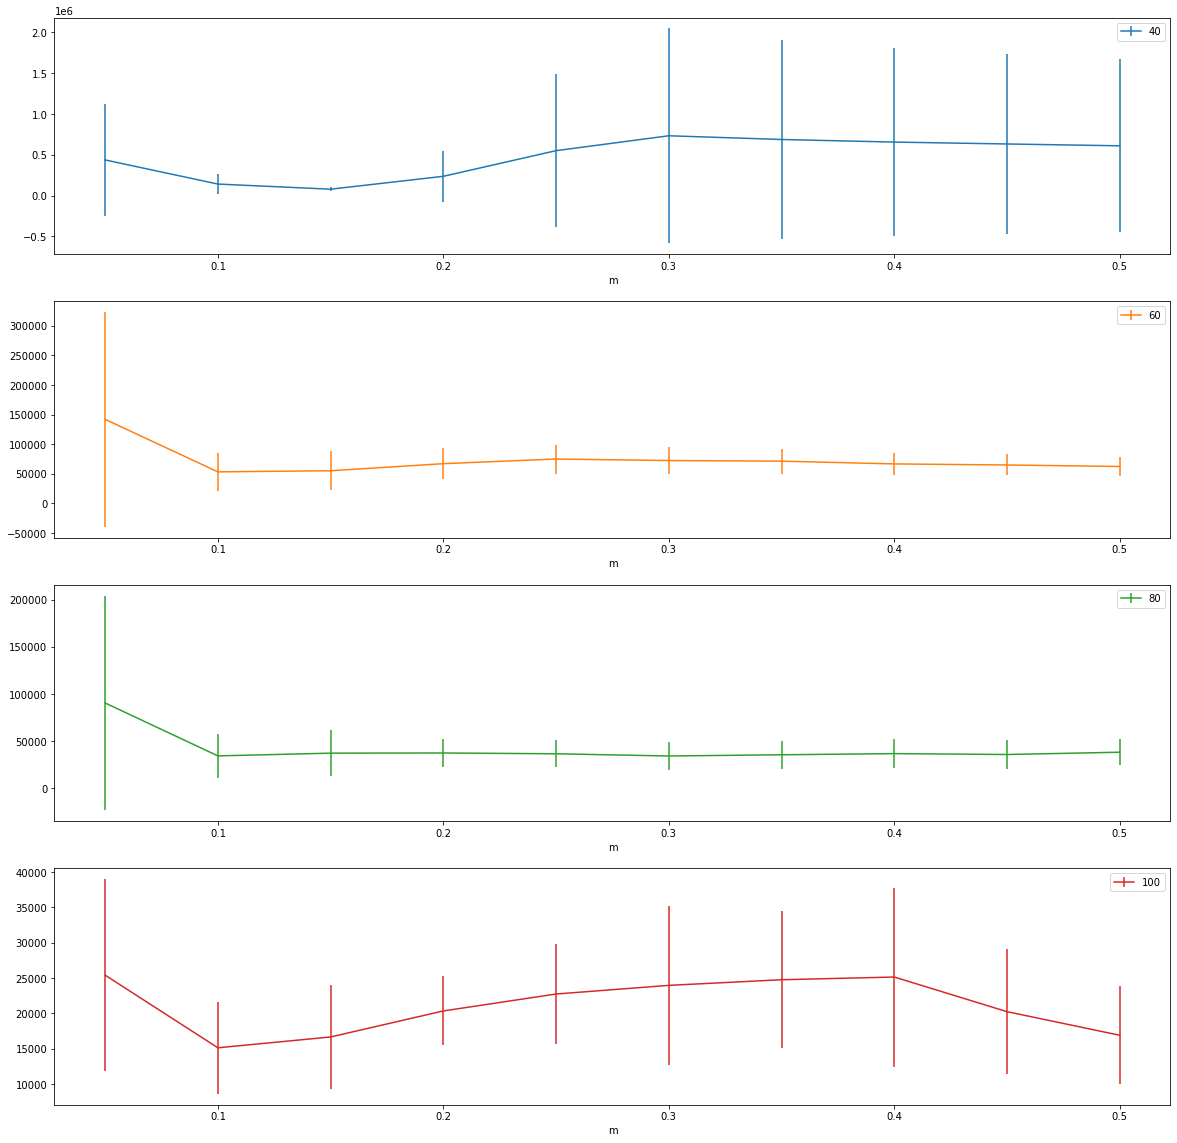

In [40]:
df_by_t_m[['mean', 'ci95_hi']].unstack()[0.05:].plot(y='mean', subplots=True, figsize=(20, 20), sharex=False, yerr='ci95_hi')